In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as scp
import math
import statistics
import seaborn as sns
import sklearn
import tensorflow
import keras

from matplotlib.patches import Polygon
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy import stats
from statistics import stdev
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [7]:
print(sklearn.__version__)

1.1.0


In [8]:
datainput = pd.read_excel("dengue_features_train.xlsx")

In [9]:
datainput

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [10]:
dataoutput = pd.read_excel("dengue_labels_train.xlsx")

In [11]:
dataoutput

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [12]:
df1 = datainput.interpolate(); #not mix nvdi

In [13]:
df2 = df1.assign(ndvi_north = (df1["ndvi_ne"]+df1["ndvi_nw"])/2)
df_mix_ndvi = df2.assign(ndvi_south = (df1["ndvi_se"]+df1["ndvi_sw"])/2)  #mix ndvi
df_mix_ndvi_1 = df_mix_ndvi.replace('sj', 0) 
df_mix_ndvi_2 = df_mix_ndvi_1.replace('iq', 1)
df_mix_ndvi_3 = df_mix_ndvi_2.drop(["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw","reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","week_start_date","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"], axis=1)
df_mix_ndvi_4 = df_mix_ndvi_3
df_mix_ndvi_4 = df_mix_ndvi_4.assign(total_cases = dataoutput["total_cases"])
df_mix_ndvi_exclude_forcast_value_final = df_mix_ndvi_4.sample(frac=1).reset_index(drop=True)

In [14]:
df2 = df1.assign(ndvi_north = (df1["ndvi_ne"]+df1["ndvi_nw"])/2)
df_mix_ndvi = df2.assign(ndvi_south = (df1["ndvi_se"]+df1["ndvi_sw"])/2)  #mix ndvi
df_mix_ndvi_1 = df_mix_ndvi.replace('sj', 0) 
df_mix_ndvi_2 = df_mix_ndvi_1.replace('iq', 1)
df_mix_ndvi_3 = df_mix_ndvi_2.drop(["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw","week_start_date"], axis=1)
df_mix_ndvi_4_include_forcast_value = df_mix_ndvi_3
df_mix_ndvi_4_include_forcast_value = df_mix_ndvi_4_include_forcast_value.assign(total_cases = dataoutput["total_cases"])
df_mix_ndvi_include_forcast_value_final = df_mix_ndvi_4_include_forcast_value.sample(frac=1).reset_index(drop=True)

In [15]:
df_normal_data_include_forcast_value_1 = df1.replace('sj', 0) 
df_normal_data_include_forcast_value_2 = df_normal_data_include_forcast_value_1.replace('iq', 1)
df_normal_data_include_forcast_value_2 = df_normal_data_include_forcast_value_2.drop(["week_start_date"], axis=1)
df_normal_data_include_forcast_value_3 = df_normal_data_include_forcast_value_2
df_normal_data_include_forcast_value_3 = df_normal_data_include_forcast_value_3.assign(total_cases = dataoutput["total_cases"])
df_normal_data_include_forcast_value_final = df_normal_data_include_forcast_value_3.sample(frac=1).reset_index(drop=True)

In [16]:
df_normal_data_1 = df1.replace('sj', 0) 
df_normal_data_2 = df_normal_data_1.replace('iq', 1)
df_normal_data_3 = df_normal_data_2.drop(["reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","week_start_date","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"], axis=1)
df_normal_data_4 = df_normal_data_3
df_normal_data_4 = df_normal_data_4.assign(total_cases = dataoutput["total_cases"])
df_normal_data_exclude_forcast_value_final = df_normal_data_4.sample(frac=1).reset_index(drop=True)

In [17]:
#4 difference data structure
#   df_mix_ndvi_exclude_forcast_value_final model 1
#   df_mix_ndvi_include_forcast_value_final model 2
#   df_normal_data_exclude_forcast_value_final model 3
#   df_normal_data_include_forcast_value_final model 4

In [18]:
#create train set for model 1


regr_model_1 = linear_model.LinearRegression()
df_train_model_1 = df_mix_ndvi_exclude_forcast_value_final.iloc[:1164,:]
df_test_model_1 = df_mix_ndvi_exclude_forcast_value_final.iloc[1164:,:]
x_train_model_1 = df_train_model_1[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']]
y_train_model_1 = df_train_model_1['total_cases']
regr_model_1.fit(x_train_model_1, y_train_model_1)

#create test set for model 1

x_test_model_1 = df_test_model_1[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']]
y_test_model_1 = df_test_model_1['total_cases']

y_pred_model_1 = regr_model_1.predict(x_test_model_1)
y_test_array_model_1 = y_test_model_1.to_numpy()

print("Coefficients: \n", regr_model_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_1, y_pred_model_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_1, y_pred_model_1))

Coefficients: 
 [-9.87670697e+00 -1.73684798e+00  4.53296755e-01 -9.37665184e-03
  9.04843107e-01 -2.76605890e+00  2.47881489e+00  6.95486702e-01
  7.27950230e-03  3.40104200e+00 -9.63746616e+00]
Mean squared error: 1760.61
Coefficient of determination: 0.16


In [19]:
#create train set for model 2


regr_model_2 = linear_model.LinearRegression()
df_train_model_2 = df_mix_ndvi_include_forcast_value_final.iloc[:1164,:]
df_test_model_2 = df_mix_ndvi_include_forcast_value_final.iloc[1164:,:]
x_train_model_2 = df_train_model_2[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_train_model_2 = df_train_model_2['total_cases']
regr_model_2.fit(x_train_model_2, y_train_model_2)
#create test set for model 2

x_test_model_2 = df_test_model_2[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_test_model_2 = df_test_model_2['total_cases']

y_pred_model_2 = regr_model_2.predict(x_test_model_2)
y_test_array_model_2 = y_test_model_2.to_numpy()

print("Coefficients: \n", regr_model_2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_2, y_pred_model_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_2, y_pred_model_2))


Coefficients: 
 [ 1.90557438e+01 -2.05073406e+00  4.24115237e-01 -2.81198455e+13
 -2.52194438e+00 -2.16279307e+00  3.07041813e+00  4.14582691e-01
 -2.18074131e-03 -1.03228545e+01 -7.20900997e+00 -6.17608915e+00
 -6.19566609e+00 -8.64047590e+00  2.67468989e-01  2.10698423e-01
  2.81198455e+13  9.04852832e-03 -3.55074603e+00  2.58924293e+01
 -1.72837810e+00]
Mean squared error: 1210.80
Coefficient of determination: 0.14


In [20]:
#create train set for model 3


regr_model_3 = linear_model.LinearRegression()
df_train_model_3 = df_normal_data_exclude_forcast_value_final.iloc[:1164,:]
df_test_model_3 = df_normal_data_exclude_forcast_value_final.iloc[1164:,:]
x_train_model_3 = df_train_model_3[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
y_train_model_3 = df_train_model_3['total_cases']
regr_model_3.fit(x_train_model_3, y_train_model_3)
#create test set for model 3

x_test_model_3 = df_test_model_3[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
y_test_model_3 = df_test_model_3['total_cases']

y_pred_model_3 = regr_model_3.predict(x_test_model_3)
y_test_array_model_3 = y_test_model_3.to_numpy()

print("Coefficients: \n", regr_model_3.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_3, y_pred_model_3))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_3, y_pred_model_3))



Coefficients: 
 [-1.05379398e+01 -1.54760910e+00  4.73581938e-01 -1.01498272e-02
  2.12556460e+00 -1.93351414e+00  9.37072659e-01  8.51962694e-01
  7.64078728e-03  3.02830506e+01 -4.33602907e+01 -8.53374269e+01
  6.87268995e+01]
Mean squared error: 2176.40
Coefficient of determination: 0.17


In [21]:
#create train set for model 4


regr_model_4 = linear_model.LinearRegression()
df_train_model_4 = df_normal_data_include_forcast_value_final.iloc[:1164,:]
df_test_model_4 = df_normal_data_include_forcast_value_final.iloc[1164:,:]
x_train_model_4 = df_train_model_4[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_train_model_4 = df_train_model_4['total_cases']
regr_model_4.fit(x_train_model_4, y_train_model_4)
#create test set for model 4

x_test_model_4 = df_test_model_4[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_test_model_4 = df_test_model_4['total_cases']

y_pred_model_4 = regr_model_4.predict(x_test_model_4)
y_test_array_model_4 = y_test_model_4.to_numpy()

print("Coefficients: \n", regr_model_4.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_4, y_pred_model_4))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_4, y_pred_model_4))

Coefficients: 
 [ 8.72783380e+00 -1.80523459e+00  4.30995635e-01 -1.50024766e+11
 -2.23470518e+00 -1.12333439e+00  1.96811465e+00 -2.96882177e-01
  1.62742244e-03  3.01369953e+01 -3.80092220e+01 -9.55381762e+01
  7.53233344e+01  1.39742563e+00 -8.73837836e+00 -1.08167586e+01
  1.28659879e+00 -8.97336336e-02  1.50024766e+11 -2.20768720e-02
 -2.18510959e+00  2.35097907e+01 -2.40126849e+00]
Mean squared error: 1764.08
Coefficient of determination: 0.19


<AxesSubplot:>

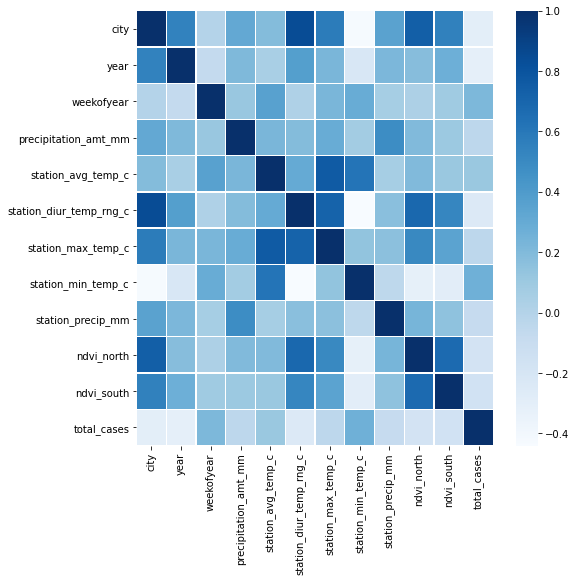

In [22]:
corrMatrix_model_1 = df_mix_ndvi_exclude_forcast_value_final.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrMatrix_model_1, linewidths=.3,cmap="Blues")

<AxesSubplot:>

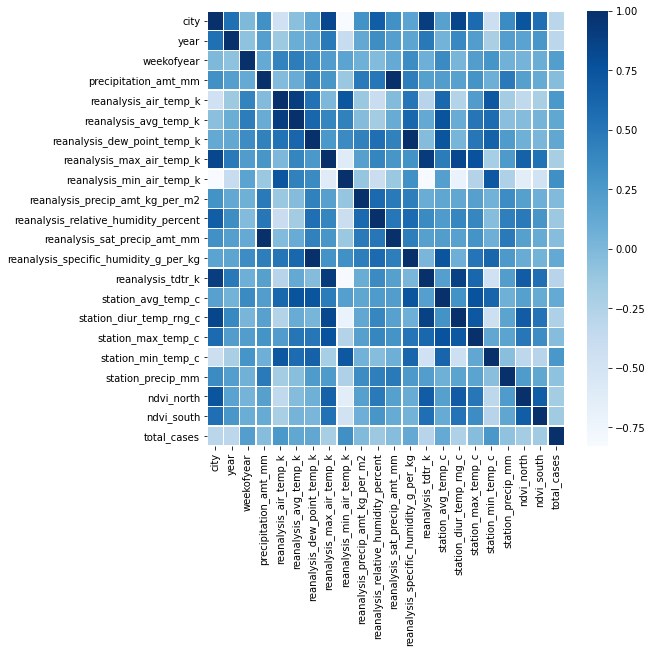

In [23]:
corrMatrix_model_2 = df_mix_ndvi_include_forcast_value_final.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrMatrix_model_2, linewidths=.3,cmap="Blues")

<AxesSubplot:>

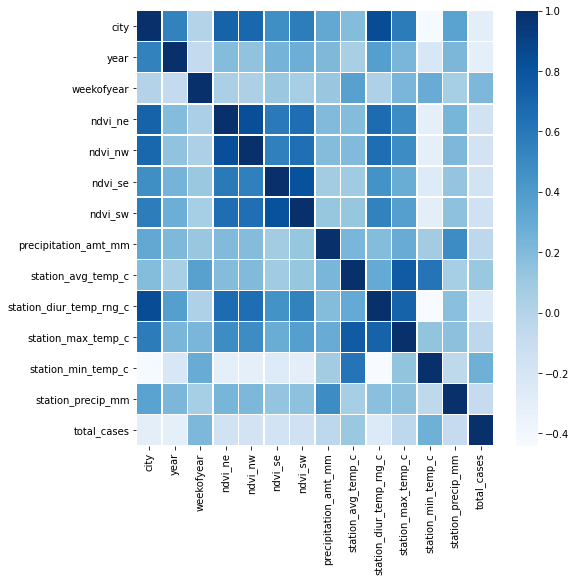

In [24]:
corrMatrix_model_3 = df_normal_data_exclude_forcast_value_final.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrMatrix_model_3, linewidths=.3,cmap="Blues")

<AxesSubplot:>

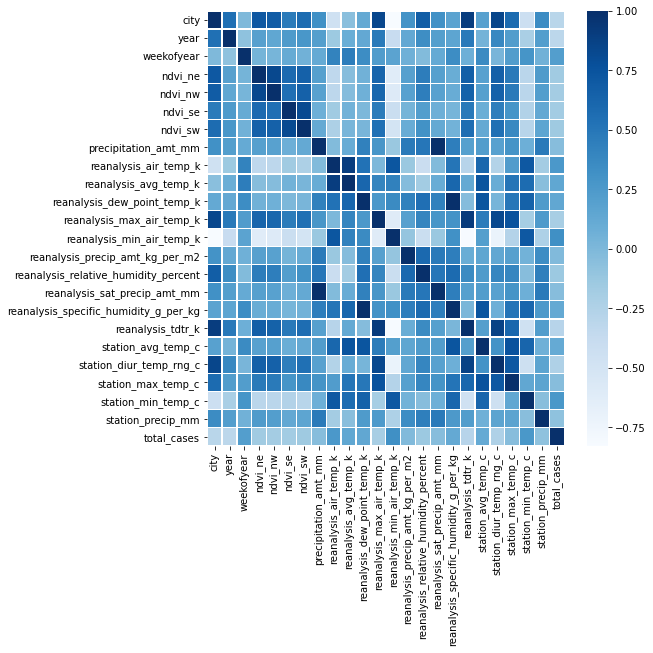

In [25]:
corrMatrix_model_4 = df_normal_data_include_forcast_value_final.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrMatrix_model_4, linewidths=.3,cmap="Blues")

In [26]:
features_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:, features_1].values
# Separating out the target
y_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_1 = StandardScaler().fit_transform(x_1)


#normallized data

In [27]:
features_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_2 = df_mix_ndvi_include_forcast_value_final.loc[:, features_2].values
# Separating out the target
y_2 = df_mix_ndvi_include_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_2 = StandardScaler().fit_transform(x_2)


#normallized data

In [28]:
features_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_3 = df_normal_data_exclude_forcast_value_final.loc[:, features_3].values
# Separating out the target
y_3 = df_normal_data_exclude_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_3 = StandardScaler().fit_transform(x_3)


#normallized data

In [29]:
features_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_4 = df_normal_data_include_forcast_value_final.loc[:, features_4].values
# Separating out the target
y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_4 = StandardScaler().fit_transform(x_4)



#normallized data

Text(0, 0.5, 'cumulative explained variance')

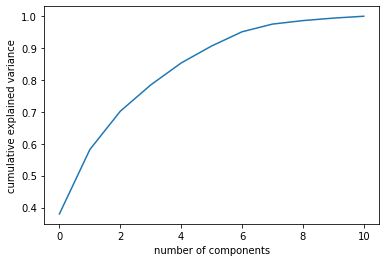

In [30]:
pca_1 = PCA().fit(x_1)
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [31]:
pca_1 = PCA(n_components=6)
principalComponents_1 = pca_1.fit_transform(x_1)
principalDf_1 = pd.DataFrame(data = principalComponents_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

Text(0, 0.5, 'cumulative explained variance')

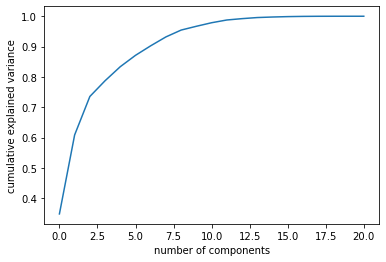

In [32]:
pca_2 = PCA().fit(x_2)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [33]:
pca_2 = PCA(n_components=7)
principalComponents_2 = pca_2.fit_transform(x_2)
principalDf_2 = pd.DataFrame(data = principalComponents_2, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

Text(0, 0.5, 'cumulative explained variance')

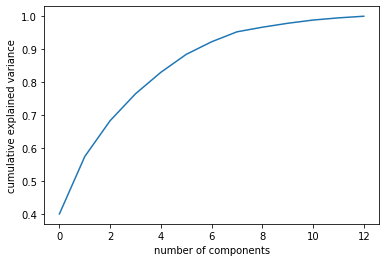

In [34]:
pca_3 = PCA().fit(x_3)
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [35]:
pca_3 = PCA(n_components=8)
principalComponents_3 = pca_3.fit_transform(x_3)
principalDf_3 = pd.DataFrame(data = principalComponents_3, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

Text(0, 0.5, 'cumulative explained variance')

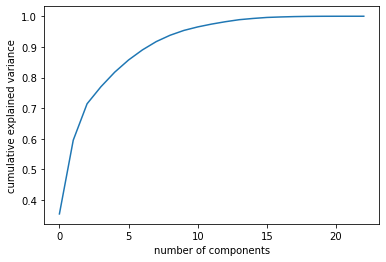

In [36]:
pca_4 = PCA().fit(x_4)
plt.plot(np.cumsum(pca_4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [37]:
pca_4 = PCA(n_components=10)
principalComponents_4 = pca_4.fit_transform(x_4)
principalDf_4 = pd.DataFrame(data = principalComponents_4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10'])

In [38]:
#create train set for model 1


regr_model_PCA_1 = linear_model.LinearRegression()
df_train_model_PCA_1 = principalDf_1.iloc[:1164,:]
df_test_model_PCA_1 = principalDf_1.iloc[1164:,:]
x_train_model_PCA_1 = df_train_model_PCA_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_1 = y_1[:1164,:]
regr_model_PCA_1.fit(x_train_model_PCA_1, y_train_model_PCA_1)

#create test set for model 1

x_test_model_PCA_1 = df_test_model_PCA_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_1 = y_1[1164:,:]

y_pred_model_PCA_1 = regr_model_PCA_1.predict(x_test_model_PCA_1)
y_test_array_model_PCA_1 = y_test_model_PCA_1

print("Coefficients: \n", regr_model_PCA_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1, y_pred_model_PCA_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1, y_pred_model_PCA_1))

Coefficients: 
 [[-4.83592173 -7.81576844 -2.51564844  8.60953039 -2.33693453 -2.57276442]]
Mean squared error: 1768.09
Coefficient of determination: 0.16


In [39]:
#create train set for model 2


regr_model_PCA_2 = linear_model.LinearRegression()
df_train_model_PCA_2 = principalDf_2.iloc[:1164,:]
df_test_model_PCA_2 = principalDf_2.iloc[1164:,:]
x_train_model_PCA_2 = df_train_model_PCA_2[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7']]
y_train_model_PCA_2 = y_2[:1164,:]
regr_model_PCA_2.fit(x_train_model_PCA_2, y_train_model_PCA_2)

#create test set for model 2

x_test_model_PCA_2 = df_test_model_PCA_2[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7']]
y_test_model_PCA_2 = y_2[1164:,:]

y_pred_model_PCA_2 = regr_model_PCA_2.predict(x_test_model_PCA_2)
y_test_array_model_PCA_2 = y_test_model_PCA_2

print("Coefficients: \n", regr_model_PCA_2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_2, y_pred_model_PCA_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_2, y_pred_model_PCA_2))

Coefficients: 
 [[-3.60064256 -5.37036335 -0.25393772 -0.63919673  9.82668784  0.25288971
   4.4916169 ]]
Mean squared error: 1215.76
Coefficient of determination: 0.14


In [40]:
#create train set for model 2


regr_model_PCA_3 = linear_model.LinearRegression()
df_train_model_PCA_3 = principalDf_3.iloc[:1164,:]
df_test_model_PCA_3 = principalDf_3.iloc[1164:,:]
x_train_model_PCA_3 = df_train_model_PCA_3[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_3 = y_3[:1164,:]
regr_model_PCA_3.fit(x_train_model_PCA_3, y_train_model_PCA_3)

#create test set for model 3

x_test_model_PCA_3 = df_test_model_PCA_3[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_3 = y_3[1164:,:]

y_pred_model_PCA_3 = regr_model_PCA_3.predict(x_test_model_PCA_3)
y_test_array_model_PCA_3 = y_test_model_PCA_3

print("Coefficients: \n", regr_model_PCA_3.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_3, y_pred_model_PCA_3))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_3, y_pred_model_PCA_3))

Coefficients: 
 [[-4.42078361 -6.81733103 -4.7220402  -6.089781   -3.17374965  3.7318154
   0.06992146  1.78449588]]
Mean squared error: 2227.17
Coefficient of determination: 0.15


In [41]:
#create train set for model 4


regr_model_PCA_4 = linear_model.LinearRegression()
df_train_model_PCA_4 = principalDf_4.iloc[:1164,:]
df_test_model_PCA_4 = principalDf_4.iloc[1164:,:]
x_train_model_PCA_4 = df_train_model_PCA_4[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10']]
y_train_model_PCA_4 = y_4[:1164,:]
regr_model_PCA_4.fit(x_train_model_PCA_4, y_train_model_PCA_4)

#create test set for model 4

x_test_model_PCA_4 = df_test_model_PCA_4[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10']]
y_test_model_PCA_4 = y_4[1164:,:]

y_pred_model_PCA_4 = regr_model_PCA_4.predict(x_test_model_PCA_4)
y_test_array_model_PCA_4 = y_test_model_PCA_4

print("Coefficients: \n", regr_model_PCA_4.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_4, y_pred_model_PCA_4))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_4, y_pred_model_PCA_4))

Coefficients: 
 [[-3.52328257 -4.55652642 -1.05227083 -5.69812244  0.85966704 -6.43412988
  -4.97343105 -0.18319355 -1.0077307  -2.73944714]]
Mean squared error: 1803.11
Coefficient of determination: 0.17


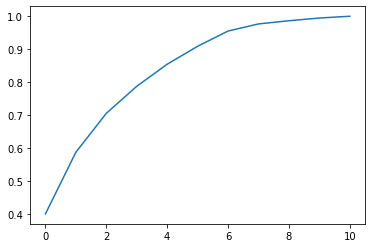

In [42]:
features_smote_1 = ['year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south', 'total_cases']
# Separating out the features
x_smote_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:1164, features_smote_1].values
y_smote_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:1164,['city']].values
sm_1 = SMOTE(random_state=42)
x_sm_1, y_sm_1 = sm_1.fit_resample(x_smote_1,y_smote_1)
temp_x_smote_1 = pd.DataFrame(data = x_sm_1, columns = ['year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south', 'total_cases'])
temp_y_smote_1 = pd.DataFrame(data = y_sm_1, columns = ['city'])
y_smote_1 = temp_x_smote_1['total_cases']
temp_x_smote_1 = temp_x_smote_1.drop(['total_cases'], axis=1)
x_smote_1 = temp_x_smote_1.assign(city = temp_y_smote_1['city']) 


features_smote_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_PCA_smote_1 = x_smote_1.loc[:, features_smote_1].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_1 = y_smote_1.values
# Standardizing the features
x_PCA_smote_1 = StandardScaler().fit_transform(x_smote_1)

pca_smote_1 = PCA().fit(x_PCA_smote_1)
plt.plot(np.cumsum(pca_smote_1.explained_variance_ratio_))

In [43]:
pca_smote_final_1 = PCA(n_components=8)
principalComponents_smote_1 = pca_smote_final_1.fit_transform(x_PCA_smote_1)
principalDf_smote_1 = pd.DataFrame(data = principalComponents_smote_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_1 = PCA(n_components=8)
principalComponents_smote_1 = pca_smote_1.fit_transform(x_PCA_smote_1)
principalDf_smote_1 = pd.DataFrame(data = principalComponents_smote_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

In [44]:
#create train set for model 1



regr_model_PCA_smote_1 = linear_model.LinearRegression()
df_train_model_PCA_smote_1 = principalDf_smote_1.iloc[:1497,:]
df_test_model_PCA_smote_1 = principalDf_1.iloc[1164:,:]
x_train_model_PCA_smote_1 = df_train_model_PCA_smote_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_smote_1 = y_PCA_smote_1[:1497]
regr_model_PCA_smote_1.fit(x_train_model_PCA_smote_1, y_train_model_PCA_smote_1)

#create test set for model 1

x_test_model_PCA_smote_1 = df_test_model_PCA_smote_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_smote_1 = y_1[1164:,:]

y_pred_model_PCA_smote_1 = regr_model_PCA_smote_1.predict(x_test_model_PCA_smote_1)
y_test_array_model_PCA_smote_1 = y_test_model_PCA_smote_1


print("Coefficients: \n", regr_model_PCA_smote_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_smote_1, y_pred_model_PCA_smote_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_smote_1, y_pred_model_PCA_smote_1))

Coefficients: 
 [-5.30596094 -7.08859896 -1.77440927  5.94147668 -4.32039135 -2.53119184]
Mean squared error: 1809.62
Coefficient of determination: 0.14


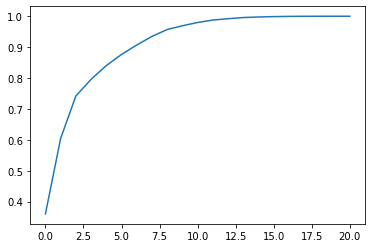

In [45]:
features_smote_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases']
# Separating out the features
x_smote_2 = df_mix_ndvi_include_forcast_value_final.loc[:1164, features_smote_2].values
y_smote_2 = df_mix_ndvi_include_forcast_value_final.loc[:1164,['city']].values
sm_2 = SMOTE(random_state=42)
x_sm_2, y_sm_2 = sm_2.fit_resample(x_smote_2,y_smote_2)
temp_x_smote_2 = pd.DataFrame(data = x_sm_2, columns = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases'])
temp_y_smote_2 = pd.DataFrame(data = y_sm_2, columns = ['city'])
y_smote_2 = temp_x_smote_2['total_cases']
temp_x_smote_2 = temp_x_smote_2.drop(['total_cases'], axis=1)
x_smote_2 = temp_x_smote_2.assign(city = temp_y_smote_2['city']) 


features_smote_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_PCA_smote_2 = x_smote_2.loc[:, features_smote_2].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_2 = y_smote_2.values
# Standardizing the features
x_PCA_smote_2 = StandardScaler().fit_transform(x_smote_2)

pca_smote_2 = PCA().fit(x_PCA_smote_2)
plt.plot(np.cumsum(pca_smote_2.explained_variance_ratio_))

In [46]:
pca_smote_final_2 = PCA(n_components=8)
principalComponents_smote_2 = pca_smote_final_2.fit_transform(x_PCA_smote_2)
principalDf_smote_2 = pd.DataFrame(data = principalComponents_smote_2, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_2 = PCA(n_components=8)
principalComponents_smote_2 = pca_smote_2.fit_transform(x_PCA_smote_2)
principalDf_smote_2 = pd.DataFrame(data = principalComponents_smote_2, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

In [47]:
#create train set for model 2



regr_model_PCA_smote_2 = linear_model.LinearRegression()
df_train_model_PCA_smote_2 = principalDf_smote_2.iloc[:1497,:]
df_test_model_PCA_smote_2 = principalDf_2.iloc[1164:,:]
x_train_model_PCA_smote_2 = df_train_model_PCA_smote_2[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7']]
y_train_model_PCA_smote_2 = y_PCA_smote_2[:1497]
regr_model_PCA_smote_2.fit(x_train_model_PCA_smote_2, y_train_model_PCA_smote_2)

#create test set for model 2

x_test_model_PCA_smote_2 = df_test_model_PCA_smote_2[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7']]
y_test_model_PCA_smote_2 = y_2[1164:,:]

y_pred_model_PCA_smote_2 = regr_model_PCA_smote_2.predict(x_test_model_PCA_smote_2)
y_test_array_model_PCA_smote_2 = y_test_model_PCA_smote_2


print("Coefficients: \n", regr_model_PCA_smote_2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_smote_2, y_pred_model_PCA_smote_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_smote_2, y_pred_model_PCA_smote_2))

Coefficients: 
 [-4.41015294 -4.59311082 -0.5332354   2.35379365  7.45588289  2.87608705
 -3.64581634]
Mean squared error: 1284.66
Coefficient of determination: 0.09


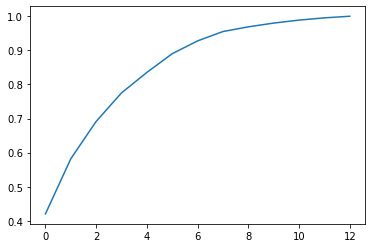

In [48]:
features_smote_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw', 'total_cases']
# Separating out the features
x_smote_3 = df_normal_data_exclude_forcast_value_final.loc[:1164, features_smote_3].values
y_smote_3 = df_normal_data_exclude_forcast_value_final.loc[:1164,['city']].values
sm_3 = SMOTE(random_state=42)
x_sm_3, y_sm_3 = sm_3.fit_resample(x_smote_3,y_smote_3)
temp_x_smote_3 = pd.DataFrame(data = x_sm_3, columns = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw', 'total_cases'])
temp_y_smote_3 = pd.DataFrame(data = y_sm_3, columns = ['city'])
y_smote_3 = temp_x_smote_3['total_cases']
temp_x_smote_3 = temp_x_smote_3.drop(['total_cases'], axis=1)
x_smote_3 = temp_x_smote_3.assign(city = temp_y_smote_3['city']) 


features_smote_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_PCA_smote_3 = x_smote_3.loc[:, features_smote_3].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_3 = y_smote_3.values
# Standardizing the features
x_PCA_smote_3 = StandardScaler().fit_transform(x_smote_3)

pca_smote_3 = PCA().fit(x_PCA_smote_3)
plt.plot(np.cumsum(pca_smote_3.explained_variance_ratio_))

In [49]:
pca_smote_final_3 = PCA(n_components=8)
principalComponents_smote_3 = pca_smote_final_3.fit_transform(x_PCA_smote_3)
principalDf_smote_3 = pd.DataFrame(data = principalComponents_smote_3, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_3 = PCA(n_components=8)
principalComponents_smote_3 = pca_smote_3.fit_transform(x_PCA_smote_3)
principalDf_smote_3 = pd.DataFrame(data = principalComponents_smote_3, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

In [50]:
#create train set for model 3

regr_model_PCA_smote_3 = linear_model.LinearRegression()
df_train_model_PCA_smote_3 = principalDf_smote_3.iloc[:1497,:]
df_test_model_PCA_smote_3 = principalDf_3.iloc[1164:,:]
x_train_model_PCA_smote_3 = df_train_model_PCA_smote_3[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_smote_3 = y_PCA_smote_3[:1497]
regr_model_PCA_smote_3.fit(x_train_model_PCA_smote_3, y_train_model_PCA_smote_3)

#create test set for model 3

x_test_model_PCA_smote_3 = df_test_model_PCA_smote_3[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_smote_3 = y_3[1164:,:]

y_pred_model_PCA_smote_3 = regr_model_PCA_smote_3.predict(x_test_model_PCA_smote_3)
y_test_array_model_PCA_smote_3 = y_test_model_PCA_smote_3


print("Coefficients: \n", regr_model_PCA_smote_3.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_smote_3, y_pred_model_PCA_smote_3))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_smote_3, y_pred_model_PCA_smote_3))

Coefficients: 
 [-4.76379656 -6.22061223 -4.23741193  5.40324288 -1.15502883 -3.51741092]
Mean squared error: 2503.62
Coefficient of determination: 0.05


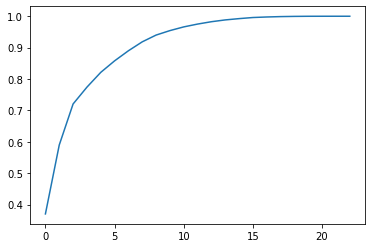

In [51]:
features_smote_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases']
# Separating out the features
x_smote_4 = df_normal_data_include_forcast_value_final.loc[:1164, features_smote_4].values
y_smote_4 = df_normal_data_include_forcast_value_final.loc[:1164,['city']].values
sm_4 = SMOTE(random_state=42)
x_sm_4, y_sm_4 = sm_4.fit_resample(x_smote_4,y_smote_4)
temp_x_smote_4 = pd.DataFrame(data = x_sm_4, columns = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases'])
temp_y_smote_4 = pd.DataFrame(data = y_sm_4, columns = ['city'])
y_smote_4 = temp_x_smote_4['total_cases']
temp_x_smote_4 = temp_x_smote_4.drop(['total_cases'], axis=1)
x_smote_4 = temp_x_smote_4.assign(city = temp_y_smote_4['city']) 


features_smote_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_PCA_smote_4 = x_smote_4.loc[:, features_smote_4].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_4 = y_smote_4.values
# Standardizing the features
x_PCA_smote_4 = StandardScaler().fit_transform(x_smote_4)

pca_smote_4 = PCA().fit(x_PCA_smote_4)
plt.plot(np.cumsum(pca_smote_4.explained_variance_ratio_))

In [52]:
pca_smote_final_4 = PCA(n_components=8)
principalComponents_smote_4 = pca_smote_final_4.fit_transform(x_PCA_smote_4)
principalDf_smote_4 = pd.DataFrame(data = principalComponents_smote_4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_4 = PCA(n_components=8)
principalComponents_smote_4 = pca_smote_4.fit_transform(x_PCA_smote_4)
principalDf_smote_4 = pd.DataFrame(data = principalComponents_smote_4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

In [53]:
#create train set for model 4

regr_model_PCA_smote_4 = linear_model.LinearRegression()
df_train_model_PCA_smote_4 = principalDf_smote_4.iloc[:1497,:]
df_test_model_PCA_smote_4 = principalDf_4.iloc[1164:,:]
x_train_model_PCA_smote_4 = df_train_model_PCA_smote_4[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_smote_4 = y_PCA_smote_4[:1497]
regr_model_PCA_smote_4.fit(x_train_model_PCA_smote_4, y_train_model_PCA_smote_4)

#create test set for model 4

x_test_model_PCA_smote_4 = df_test_model_PCA_smote_4[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_smote_4 = y_4[1164:,:]

y_pred_model_PCA_smote_4 = regr_model_PCA_smote_4.predict(x_test_model_PCA_smote_4)
y_test_array_model_PCA_smote_4 = y_test_model_PCA_smote_4


print("Coefficients: \n", regr_model_PCA_smote_4.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_smote_4, y_pred_model_PCA_smote_4))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_smote_4, y_pred_model_PCA_smote_4))

Coefficients: 
 [-3.83003452 -4.26288518 -0.92046847  4.16111823  3.37562256  6.18266945]
Mean squared error: 2154.12
Coefficient of determination: 0.01


In [54]:
#split data

In [55]:
grouped_1 = df_mix_ndvi_exclude_forcast_value_final.groupby(df_mix_ndvi_exclude_forcast_value_final["city"])
grouped_2 = df_mix_ndvi_include_forcast_value_final.groupby(df_mix_ndvi_include_forcast_value_final["city"])
grouped_3 = df_normal_data_exclude_forcast_value_final.groupby(df_normal_data_exclude_forcast_value_final["city"])
grouped_4 = df_normal_data_include_forcast_value_final.groupby(df_normal_data_include_forcast_value_final["city"])

df_mix_ndvi_exclude_forcast_value_final_0 = grouped_1.get_group(0)
df_mix_ndvi_exclude_forcast_value_final_1 = grouped_1.get_group(1)

df_mix_ndvi_include_forcast_value_final_0 = grouped_2.get_group(0)
df_mix_ndvi_include_forcast_value_final_1 = grouped_2.get_group(1)

df_normal_data_exclude_forcast_value_final_0 = grouped_3.get_group(0)
df_normal_data_exclude_forcast_value_final_1 = grouped_3.get_group(1)

df_normal_data_include_forcast_value_final_0 = grouped_4.get_group(0)
df_normal_data_include_forcast_value_final_1 = grouped_4.get_group(1)

In [56]:
features_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_1_0 = df_mix_ndvi_exclude_forcast_value_final_0.loc[:, features_1].values
# Separating out the target
y_1_0 = df_mix_ndvi_exclude_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_1_0 = StandardScaler().fit_transform(x_1_0)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

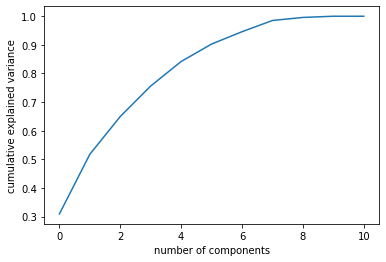

In [57]:
pca_1_0 = PCA().fit(x_1_0)
plt.plot(np.cumsum(pca_1_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [58]:
#create train set for model 1
pca_1_0 = PCA(n_components=6)
principalComponents_1_0 = pca_1_0.fit_transform(x_1_0)
principalDf_1_0 = pd.DataFrame(data = principalComponents_1_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

df_train_model_PCA_1_0 = principalDf_1_0.iloc[:748,:]
df_test_model_PCA_1_0 = principalDf_1_0.iloc[748:,:]
x_train_model_PCA_1_0 = df_train_model_PCA_1_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_1_0 = y_1_0[:748,:]

#create test set for model 1

x_test_model_PCA_1_0 = df_test_model_PCA_1_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_1_0 = y_1_0[748:,:]


In [59]:
features_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_1_1 = df_mix_ndvi_exclude_forcast_value_final_1.loc[:, features_1].values
# Separating out the target
y_1_1 = df_mix_ndvi_exclude_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_1_1 = StandardScaler().fit_transform(x_1_1)

#normallized data


Text(0, 0.5, 'cumulative explained variance')

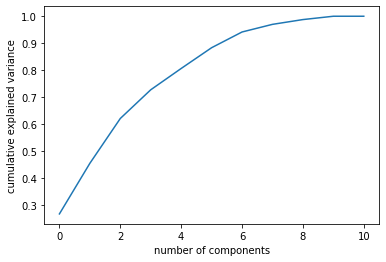

In [60]:
pca_1_1 = PCA().fit(x_1_1)
plt.plot(np.cumsum(pca_1_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [61]:
#create train set for model 1
pca_1_1 = PCA(n_components=6)
principalComponents_1_1 = pca_1_1.fit_transform(x_1_1)
principalDf_1_1 = pd.DataFrame(data = principalComponents_1_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

df_train_model_PCA_1_1 = principalDf_1_1.iloc[:416,:]
df_test_model_PCA_1_1 = principalDf_1_1.iloc[416:,:]
x_train_model_PCA_1_1 = df_train_model_PCA_1_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_1_1 = y_1_1[:416,:]


#create test set for model 1

x_test_model_PCA_1_1 = df_test_model_PCA_1_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_1_1 = y_1_1[416:,:]


In [62]:
features_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_2_0 = df_mix_ndvi_include_forcast_value_final_0.loc[:, features_2].values
# Separating out the target
y_2_0 = df_mix_ndvi_include_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_2_0 = StandardScaler().fit_transform(x_2_0)


Text(0, 0.5, 'cumulative explained variance')

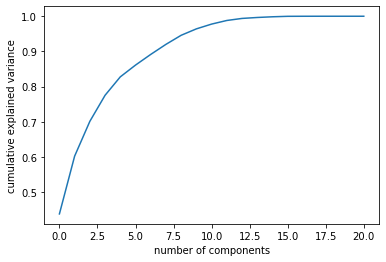

In [63]:
pca_2_0 = PCA().fit(x_2_0)
plt.plot(np.cumsum(pca_2_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [64]:
#create train set for model 2
pca_2_0 = PCA(n_components=6)
principalComponents_2_0 = pca_2_0.fit_transform(x_2_0)
principalDf_2_0 = pd.DataFrame(data = principalComponents_2_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

df_train_model_PCA_2_0 = principalDf_2_0.iloc[:748,:]
df_test_model_PCA_2_0 = principalDf_2_0.iloc[748:,:]
x_train_model_PCA_2_0 = df_train_model_PCA_2_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_2_0 = y_2_0[:748,:]


#create test set for model 1

x_test_model_PCA_2_0 = df_test_model_PCA_2_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_2_0 = y_2_0[748:,:]


In [65]:
features_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_2_1 = df_mix_ndvi_include_forcast_value_final_1.loc[:, features_2].values
# Separating out the target
y_2_1 = df_mix_ndvi_include_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_2_1 = StandardScaler().fit_transform(x_2_1)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

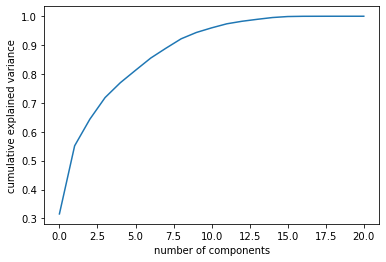

In [66]:
pca_2_1 = PCA().fit(x_2_1)
plt.plot(np.cumsum(pca_2_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [67]:
#create train set for model 1
pca_2_1 = PCA(n_components=8)
principalComponents_2_1 = pca_2_1.fit_transform(x_2_1)
principalDf_2_1 = pd.DataFrame(data = principalComponents_2_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_2_1 = principalDf_2_1.iloc[:416,:]
df_test_model_PCA_2_1 = principalDf_2_1.iloc[416:,:]
x_train_model_PCA_2_1 = df_train_model_PCA_2_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_2_1 = y_2_1[:416,:]


#create test set for model 1

x_test_model_PCA_2_1 = df_test_model_PCA_2_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_2_1 = y_2_1[416:,:]


In [68]:
features_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_3_0 = df_normal_data_exclude_forcast_value_final_0.loc[:, features_3].values
# Separating out the target
y_3_0 = df_normal_data_exclude_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_3_0 = StandardScaler().fit_transform(x_3_0)


Text(0, 0.5, 'cumulative explained variance')

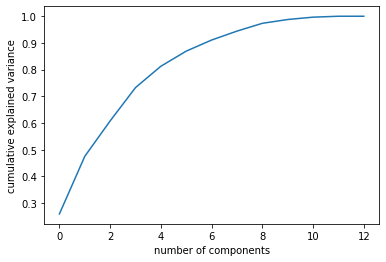

In [69]:
pca_3_0 = PCA().fit(x_3_0)
plt.plot(np.cumsum(pca_3_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [70]:
#create train set for model 2
pca_3_0 = PCA(n_components=8)
principalComponents_3_0 = pca_3_0.fit_transform(x_3_0)
principalDf_3_0 = pd.DataFrame(data = principalComponents_3_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_3_0 = principalDf_3_0.iloc[:748,:]
df_test_model_PCA_3_0 = principalDf_3_0.iloc[748:,:]
x_train_model_PCA_3_0 = df_train_model_PCA_3_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_3_0 = y_3_0[:748,:]


#create test set for model 1

x_test_model_PCA_3_0 = df_test_model_PCA_3_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_3_0 = y_3_0[748:,:]


In [71]:
features_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_3_1 = df_normal_data_exclude_forcast_value_final_1.loc[:, features_3].values
# Separating out the target
y_3_1 = df_normal_data_exclude_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_3_1 = StandardScaler().fit_transform(x_3_1)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

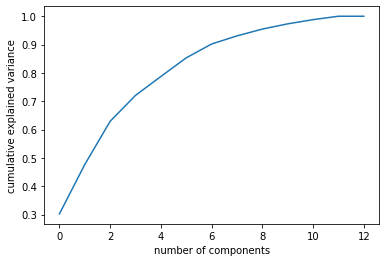

In [72]:
pca_3_1 = PCA().fit(x_3_1)
plt.plot(np.cumsum(pca_3_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [73]:
#create train set for model 1
pca_3_1 = PCA(n_components=8)
principalComponents_3_1 = pca_3_1.fit_transform(x_3_1)
principalDf_3_1 = pd.DataFrame(data = principalComponents_3_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_3_1 = principalDf_3_1.iloc[:416,:]
df_test_model_PCA_3_1 = principalDf_3_1.iloc[416:,:]
x_train_model_PCA_3_1 = df_train_model_PCA_3_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_3_1 = y_3_1[:416,:]


#create test set for model 1

x_test_model_PCA_3_1 = df_test_model_PCA_3_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_3_1 = y_3_1[416:,:]


In [74]:
features_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_4_0 = df_normal_data_include_forcast_value_final_0.loc[:, features_4].values
# Separating out the target
y_4_0 = df_normal_data_include_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_4_0 = StandardScaler().fit_transform(x_4_0)

Text(0, 0.5, 'cumulative explained variance')

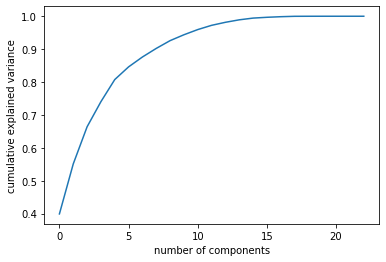

In [75]:
pca_4_0 = PCA().fit(x_4_0)
plt.plot(np.cumsum(pca_4_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [76]:
#create train set for model 2
pca_4_0 = PCA(n_components=8)
principalComponents_4_0 = pca_4_0.fit_transform(x_4_0)
principalDf_4_0 = pd.DataFrame(data = principalComponents_4_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_4_0 = principalDf_4_0.iloc[:748,:]
df_test_model_PCA_4_0 = principalDf_4_0.iloc[748:,:]
x_train_model_PCA_4_0 = df_train_model_PCA_4_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_4_0 = y_4_0[:748,:]


#create test set for model 1

x_test_model_PCA_4_0 = df_test_model_PCA_4_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_4_0 = y_4_0[748:,:]


In [77]:
features_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_4_1 = df_normal_data_include_forcast_value_final_1.loc[:, features_4].values
# Separating out the target
y_4_1 = df_normal_data_include_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_4_1 = StandardScaler().fit_transform(x_4_1)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

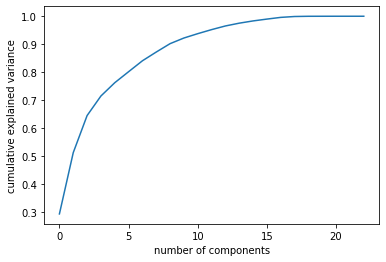

In [78]:
pca_4_1 = PCA().fit(x_4_1)
plt.plot(np.cumsum(pca_4_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [79]:
#create train set for model 1
pca_4_1 = PCA(n_components=8)
principalComponents_4_1 = pca_4_1.fit_transform(x_4_1)
principalDf_4_1 = pd.DataFrame(data = principalComponents_4_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_4_1 = principalDf_4_1.iloc[:416,:]
df_test_model_PCA_4_1 = principalDf_4_1.iloc[416:,:]
x_train_model_PCA_4_1 = df_train_model_PCA_4_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_4_1 = y_4_1[:416,:]


#create test set for model 1

x_test_model_PCA_4_1 = df_test_model_PCA_4_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_4_1 = y_4_1[416:,:]


In [80]:
regr_model_PCA_1_0 = linear_model.LinearRegression()
regr_model_PCA_1_0.fit(x_train_model_PCA_1_0, y_train_model_PCA_1_0)
y_pred_model_PCA_1_0 = regr_model_PCA_1_0.predict(x_test_model_PCA_1_0)
y_test_array_model_PCA_1_0 = y_test_model_PCA_1_0

print("Coefficients: \n", regr_model_PCA_1_0.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))

Coefficients: 
 [[-6.88380042 -2.52791642  5.07117806  2.67533996 -7.97170987 10.57959869]]
Mean squared error: 2615.11
Coefficient of determination: 0.10


In [81]:
regr_model_PCA_1_1 = linear_model.LinearRegression()
regr_model_PCA_1_1.fit(x_train_model_PCA_1_1, y_train_model_PCA_1_1)
y_pred_model_PCA_1_1 = regr_model_PCA_1_1.predict(x_test_model_PCA_1_1)
y_test_array_model_PCA_1_1 = y_test_model_PCA_1_1

print("Coefficients: \n", regr_model_PCA_1_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))

Coefficients: 
 [[ 0.24658418 -1.61207402 -0.68044261 -1.47689414  0.64948039 -0.74930732]]
Mean squared error: 71.32
Coefficient of determination: 0.04


In [82]:
regr_model_PCA_2_0 = linear_model.LinearRegression()
regr_model_PCA_2_0.fit(x_train_model_PCA_2_0, y_train_model_PCA_2_0)
y_pred_model_PCA_2_0 = regr_model_PCA_2_0.predict(x_test_model_PCA_2_0)
y_test_array_model_PCA_2_0 = y_test_model_PCA_2_0

print("Coefficients: \n", regr_model_PCA_2_0.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_2_0, y_pred_model_PCA_2_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_2_0, y_pred_model_PCA_2_0))

Coefficients: 
 [[-3.99091795  0.32304601 -6.23711822 -3.20755085 -0.70249176 11.53528728]]
Mean squared error: 1724.86
Coefficient of determination: 0.10


In [83]:
regr_model_PCA_2_1 = linear_model.LinearRegression()
regr_model_PCA_2_1.fit(x_train_model_PCA_2_1, y_train_model_PCA_2_1)
y_pred_model_PCA_2_1 = regr_model_PCA_2_1.predict(x_test_model_PCA_2_1)
y_test_array_model_PCA_2_1 = y_test_model_PCA_2_1

print("Coefficients: \n", regr_model_PCA_2_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))

Coefficients: 
 [[-0.61815847 -0.93651058 -0.3126636  -0.52993358 -0.04181514 -0.60248676
  -0.70128635  0.68107142]]
Mean squared error: 163.15
Coefficient of determination: 0.05


In [84]:
regr_model_PCA_3_0 = linear_model.LinearRegression()
regr_model_PCA_3_0.fit(x_train_model_PCA_3_0, y_train_model_PCA_3_0)
y_pred_model_PCA_3_0 = regr_model_PCA_3_0.predict(x_test_model_PCA_3_0)
y_test_array_model_PCA_3_0 = y_test_model_PCA_3_0

print("Coefficients: \n", regr_model_PCA_3_0.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))

Coefficients: 
 [[-6.70420514 -1.5085303   0.4651489   2.23567903 -4.49751319 12.54371359
   1.4124979  -0.51378005]]
Mean squared error: 3284.53
Coefficient of determination: 0.12


In [85]:
regr_model_PCA_3_1 = linear_model.LinearRegression()
regr_model_PCA_3_1.fit(x_train_model_PCA_3_1, y_train_model_PCA_3_1)
y_pred_model_PCA_3_1 = regr_model_PCA_3_1.predict(x_test_model_PCA_3_1)
y_test_array_model_PCA_3_1 = y_test_model_PCA_3_1

print("Coefficients: \n", regr_model_PCA_3_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))

Coefficients: 
 [[ 0.0119637   0.69942085 -1.43305148 -1.25610487  1.12168113 -0.36480719
   0.0519332   0.35457573]]
Mean squared error: 96.99
Coefficient of determination: 0.08


In [86]:
regr_model_PCA_4_0 = linear_model.LinearRegression()
regr_model_PCA_4_0.fit(x_train_model_PCA_4_0, y_train_model_PCA_4_0)
y_pred_model_PCA_4_0 = regr_model_PCA_3_1.predict(x_test_model_PCA_4_0)
y_test_array_model_PCA_4_0 = y_test_model_PCA_4_0

print("Coefficients: \n", regr_model_PCA_4_0.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))

Coefficients: 
 [[-3.71020094 -0.60963597 -4.21241805 -2.2299369  -4.04074642 -1.94305672
  12.86770253  2.08947325]]
Mean squared error: 3817.81
Coefficient of determination: -0.27


In [87]:
regr_model_PCA_4_1 = linear_model.LinearRegression()
regr_model_PCA_4_1.fit(x_train_model_PCA_4_1, y_train_model_PCA_4_1)
y_pred_model_PCA_4_1 = regr_model_PCA_3_1.predict(x_test_model_PCA_4_1)
y_test_array_model_PCA_4_1 = y_test_model_PCA_4_1

print("Coefficients: \n", regr_model_PCA_4_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))

Coefficients: 
 [[-0.59193883 -0.99437024  0.12672564 -0.82021331 -0.15472999  0.6748743
  -0.88963576  0.37771116]]
Mean squared error: 73.47
Coefficient of determination: -0.39


In [88]:
#x_train_model_PCA_1_0
#y_train_model_PCA_1_0

#x_test_model_PCA_1_0
#y_test_model_PCA_1_0


#########################

#x_train_model_PCA_2_0
#y_train_model_PCA_2_0

#x_test_model_PCA_2_1
#y_test_model_PCA_2_1

########################

#x_train_model_PCA_3_0
#y_train_model_PCA_3_0

#x_test_model_PCA_3_1
#y_test_model_PCA_3_1


########################


#x_train_model_PCA_4_0
#y_train_model_PCA_4_0

#x_test_model_PCA_4_1
#y_test_model_PCA_4_1












In [89]:
import sklearn as sk
#MODEL = sk.ensemble.RandomForestRegressor(n_estimators=100)

In [90]:
regressor_model_PCA_1_0  = sk.ensemble.RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth =4,
                                      max_features=4)
regressor_model_PCA_1_0.fit(x_train_model_PCA_1_0, y_train_model_PCA_1_0)
y_pred_model_PCA_1_0 = regressor_model_PCA_1_0.predict(x_test_model_PCA_1_0)
y_test_array_model_PCA_1_0 = y_test_model_PCA_1_0

print("Coefficients: \n", regressor_model_PCA_1_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))

Coefficients: 
 RandomForestRegressor(max_depth=4, max_features=4, random_state=0)
Mean squared error: 2529.93
Coefficient of determination: 0.13


<ipython-input-90-c6c2b535f860>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_model_PCA_1_0.fit(x_train_model_PCA_1_0, y_train_model_PCA_1_0)


In [91]:
regressor_model_PCA_1_1  = sk.ensemble.RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth =4,
                                      max_features=4)
regressor_model_PCA_1_1.fit(x_train_model_PCA_1_1, y_train_model_PCA_1_1)
y_pred_model_PCA_1_1 = regressor_model_PCA_1_1.predict(x_test_model_PCA_1_1)
y_test_array_model_PCA_1_1 = y_test_model_PCA_1_1

print("Coefficients: \n", regressor_model_PCA_1_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))

<ipython-input-91-2bbcb0f8f816>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_model_PCA_1_1.fit(x_train_model_PCA_1_1, y_train_model_PCA_1_1)


Coefficients: 
 RandomForestRegressor(max_depth=4, max_features=4, random_state=0)
Mean squared error: 63.34
Coefficient of determination: 0.15


In [92]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [93]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [94]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [95]:
look_back = 1

In [96]:
def create_dataset(dataset_y, look_back=1):
    dataY = []
    for i in range(len(dataset_y)):
        dataY.append(dataset_y[i, 0])
    return numpy.array(dataY)

In [97]:

trainX = numpy.reshape(x_train_model_PCA_1_0, (x_train_model_PCA_1_0.shape[0], x_train_model_PCA_1_0.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#test2 = np.array(y_train_model_PCA_1_0)
trainY = create_dataset(y_train_model_PCA_1_0, look_back)

#x_train_model_PCA_1_0.shape
trainX.shape[1]
#trainY.shape

6

In [98]:
#x_train_model_PCA_1_0
#y_train_model_PCA_1_0
#x_test_model_PCA_1_0
#y_test_model_PCA_1_0

In [99]:
#x_train_model_PCA_1_0
#y_train_model_PCA_1_0
#x_test_model_PCA_1_0
#y_test_model_PCA_1_0

In [101]:
y_train_model_PCA_1_0

array([[ 29],
       [ 72],
       [ 56],
       [ 23],
       [ 49],
       [ 17],
       [ 11],
       [ 24],
       [  3],
       [ 12],
       [ 17],
       [  1],
       [  6],
       [ 31],
       [127],
       [ 28],
       [  4],
       [ 84],
       [ 39],
       [ 37],
       [  6],
       [112],
       [  8],
       [ 15],
       [112],
       [ 18],
       [ 17],
       [ 66],
       [ 18],
       [ 15],
       [ 30],
       [ 21],
       [ 19],
       [  6],
       [  4],
       [ 19],
       [  4],
       [  4],
       [  8],
       [ 17],
       [ 14],
       [  6],
       [ 33],
       [ 16],
       [ 85],
       [  7],
       [ 37],
       [179],
       [ 66],
       [  3],
       [ 70],
       [ 12],
       [  3],
       [  5],
       [ 16],
       [ 19],
       [ 16],
       [  9],
       [ 14],
       [ 51],
       [ 17],
       [ 68],
       [  5],
       [ 31],
       [  7],
       [ 16],
       [ 25],
       [ 13],
       [ 19],
       [  5],
       [ 27],
      

In [102]:
x_train_0 = x_train_model_PCA_1_0
x_test_0 = x_test_model_PCA_1_0

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_1_0)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_1_0)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_1_0["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_1_0["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_1_0["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_1_0["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_1_0["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_1_0["principal component 6"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_1_0["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_1_0["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_1_0["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_1_0["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_1_0["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_1_0["principal component 6"])

In [103]:
#Negative Biniomial Distribution

In [104]:
from __future__ import print_function
from __future__ import division



from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures


In [105]:
def mse_nb_model_6(train, cv):
    formula =  "y ~ 1 + " \
                    "principal_component_1+ " \
                    "principal_component_2 + " \
                    "principal_component_3 + " \
                    "principal_component_4 + " \
                    "principal_component_5 + " \
                    "principal_component_6"

    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0; best_mse = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula = formula, data = train,
                        family = sm.families.NegativeBinomial(alpha = alpha))
        nb_model = model.fit()
        
        cv_pred = np.array(list(map(int, map(round, nb_model.predict(cv)))))

        mae = eval_measures.meanabs(cv_pred, cv.y)
        mse = eval_measures.mse(cv_pred, cv.y)
        
            
    total = pd.concat([train, cv])
    
    print ('mse Negative Binomial Model: ', mse)
    return mse

In [106]:
def mse_nb_model_8(train, cv):
    formula =  "y ~ 1 + " \
                    "principal_component_1+ " \
                    "principal_component_2 + " \
                    "principal_component_3 + " \
                    "principal_component_4 + " \
                    "principal_component_5 + " \
                    "principal_component_6 + " \
                    "principal_component_7 + " \
                    "principal_component_8"

    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0; best_mse = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula = formula, data = train,
                        family = sm.families.NegativeBinomial(alpha = alpha))
        nb_model = model.fit()
        
        cv_pred = np.array(list(map(int, map(round, nb_model.predict(cv)))))

        mae = eval_measures.meanabs(cv_pred, cv.y)
        mse = eval_measures.mse(cv_pred, cv.y)

            
    total = pd.concat([train, cv])
    
    print ('mse Negative Binomial Model: ', mse)
    return mse

In [107]:
mse_nb_model_6(df_train_nb_0, df_test_nb_0)


mse Negative Binomial Model:  2594.5


2594.5

In [108]:
#x_train_model_PCA_1_0
#y_train_model_PCA_1_0
#x_test_model_PCA_1_0
#y_test_model_PCA_1_0

In [109]:
x_train_0 = x_train_model_PCA_1_1
x_test_0 = x_test_model_PCA_1_1

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_1_1)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_1_1)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_1_1["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_1_1["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_1_1["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_1_1["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_1_1["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_1_1["principal component 6"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_1_1["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_1_1["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_1_1["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_1_1["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_1_1["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_1_1["principal component 6"])

In [110]:
mse_nb_model_6(df_train_nb_0, df_test_nb_0)


mse Negative Binomial Model:  75.78846153846153


75.78846153846153

In [111]:
x_train_0 = x_train_model_PCA_2_0
x_test_0 = x_test_model_PCA_2_0

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_2_0)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_2_0)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_2_0["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_2_0["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_2_0["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_2_0["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_2_0["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_2_0["principal component 6"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_2_0["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_2_0["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_2_0["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_2_0["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_2_0["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_2_0["principal component 6"])

In [112]:
mse_nb_model_6(df_train_nb_0, df_test_nb_0)


mse Negative Binomial Model:  1709.037234042553


1709.037234042553

In [113]:
x_train_0 = x_train_model_PCA_2_1
x_test_0 = x_test_model_PCA_2_1

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_2_1)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_2_1)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_2_1["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_2_1["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_2_1["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_2_1["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_2_1["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_2_1["principal component 6"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_2_1["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_2_1["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_2_1["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_2_1["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_2_1["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_2_1["principal component 6"])

In [114]:
mse_nb_model_6(df_train_nb_0, df_test_nb_0)


mse Negative Binomial Model:  161.46153846153845


161.46153846153845

In [115]:
x_train_0 = x_train_model_PCA_3_0
x_test_0 = x_test_model_PCA_3_0

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_3_0)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_3_0)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_3_0["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_3_0["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_3_0["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_3_0["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_3_0["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_3_0["principal component 6"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_7 = x_train_model_PCA_3_0["principal component 7"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_8 = x_train_model_PCA_3_0["principal component 8"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_3_0["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_3_0["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_3_0["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_3_0["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_3_0["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_3_0["principal component 6"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_7 = x_test_model_PCA_3_0["principal component 7"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_8 = x_test_model_PCA_3_0["principal component 8"])

In [116]:
mse_nb_model_8(df_train_nb_0, df_test_nb_0)


mse Negative Binomial Model:  3207.9627659574467


3207.9627659574467

In [117]:
x_train_0 = x_train_model_PCA_3_1
x_test_0 = x_test_model_PCA_3_1

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_3_1)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_3_1)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_3_1["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_3_1["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_3_1["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_3_1["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_3_1["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_3_1["principal component 6"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_7 = x_train_model_PCA_3_1["principal component 7"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_8 = x_train_model_PCA_3_1["principal component 8"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_3_1["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_3_1["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_3_1["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_3_1["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_3_1["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_3_1["principal component 6"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_7 = x_test_model_PCA_3_1["principal component 7"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_8 = x_test_model_PCA_3_1["principal component 8"])

In [118]:
mse_nb_model_8(df_train_nb_0, df_test_nb_0)

mse Negative Binomial Model:  99.22115384615384


99.22115384615384

In [119]:
x_train_0 = x_train_model_PCA_4_0
x_test_0 = x_test_model_PCA_4_0

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_4_0)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_4_0)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_4_0["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_4_0["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_4_0["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_4_0["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_4_0["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_4_0["principal component 6"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_7 = x_train_model_PCA_4_0["principal component 7"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_8 = x_train_model_PCA_4_0["principal component 8"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_4_0["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_4_0["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_4_0["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_4_0["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_4_0["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_4_0["principal component 6"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_7 = x_test_model_PCA_4_0["principal component 7"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_8 = x_test_model_PCA_4_0["principal component 8"])

In [120]:
mse_nb_model_8(df_train_nb_0, df_test_nb_0)

mse Negative Binomial Model:  2669.473404255319


2669.473404255319

In [121]:
x_train_0 = x_train_model_PCA_4_1
x_test_0 = x_test_model_PCA_4_1

df_train_nb_0 = x_train_0 .assign(y = y_train_model_PCA_4_1)
df_test_nb_0 = x_test_0 .assign(y = y_test_model_PCA_4_1)

df_train_nb_0 = df_train_nb_0 .assign(principal_component_1 = x_train_model_PCA_4_1["principal component 1"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_2 = x_train_model_PCA_4_1["principal component 2"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_3 = x_train_model_PCA_4_1["principal component 3"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_4 = x_train_model_PCA_4_1["principal component 4"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_5 = x_train_model_PCA_4_1["principal component 5"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_6 = x_train_model_PCA_4_1["principal component 6"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_7 = x_train_model_PCA_4_1["principal component 7"])
df_train_nb_0 = df_train_nb_0 .assign(principal_component_8 = x_train_model_PCA_4_1["principal component 8"])



df_test_nb_0 = df_test_nb_0 .assign(principal_component_1 = x_test_model_PCA_4_1["principal component 1"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_2 = x_test_model_PCA_4_1["principal component 2"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_3 = x_test_model_PCA_4_1["principal component 3"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_4 = x_test_model_PCA_4_1["principal component 4"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_5 = x_test_model_PCA_4_1["principal component 5"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_6 = x_test_model_PCA_4_1["principal component 6"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_7 = x_test_model_PCA_4_1["principal component 7"])
df_test_nb_0 = df_test_nb_0 .assign(principal_component_8 = x_test_model_PCA_4_1["principal component 8"])

In [122]:
mse_nb_model_8(df_train_nb_0, df_test_nb_0)

mse Negative Binomial Model:  52.02884615384615


52.02884615384615

In [123]:
#df_mix_ndvi_exclude_forcast_value_final_0 = grouped_1.get_group(0)
#df_mix_ndvi_exclude_forcast_value_final_1 = grouped_1.get_group(1)

#df_mix_ndvi_include_forcast_value_final_0 = grouped_2.get_group(0)
#df_mix_ndvi_include_forcast_value_final_1 = grouped_2.get_group(1)

#df_normal_data_exclude_forcast_value_final_0 = grouped_3.get_group(0)
#df_normal_data_exclude_forcast_value_final_1 = grouped_3.get_group(1)

#df_normal_data_include_forcast_value_final_0 = grouped_4.get_group(0)
#df_normal_data_include_forcast_value_final_1 = grouped_4.get_group(1)

In [135]:
df_mix_ndvi_exclude_forcast_value_final_1.shape

(520, 12)

In [134]:
#create train set for model 1


regr_model_1 = linear_model.LinearRegression()
df_train_model_1 = df_mix_ndvi_exclude_forcast_value_final_0.iloc[:748,:]
df_test_model_1 = df_mix_ndvi_exclude_forcast_value_final_0.iloc[748:,:]
x_train_model_1 = df_train_model_1[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']]
y_train_model_1 = df_train_model_1['total_cases']
regr_model_1.fit(x_train_model_1, y_train_model_1)

#create test set for model 1

x_test_model_1 = df_test_model_1[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']]
y_test_model_1 = df_test_model_1['total_cases']

y_pred_model_1 = regr_model_1.predict(x_test_model_1)
y_test_array_model_1 = y_test_model_1.to_numpy()

print("Coefficients: \n", regr_model_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_1, y_pred_model_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_1, y_pred_model_1))

Coefficients: 
 [ 0.         -2.15375808  0.82258566 -0.04590828 -3.21758274 -3.42621996
  5.38871384  0.01328695  0.01964286 -8.10108594  5.66793286]
Mean squared error: 2612.65
Coefficient of determination: 0.10


In [136]:
#create train set for model 1


regr_model_1 = linear_model.LinearRegression()
df_train_model_1 = df_mix_ndvi_exclude_forcast_value_final_1.iloc[:416,:]
df_test_model_1 = df_mix_ndvi_exclude_forcast_value_final_1.iloc[416:,:]
x_train_model_1 = df_train_model_1[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']]
y_train_model_1 = df_train_model_1['total_cases']
regr_model_1.fit(x_train_model_1, y_train_model_1)

#create test set for model 1

x_test_model_1 = df_test_model_1[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']]
y_test_model_1 = df_test_model_1['total_cases']

y_pred_model_1 = regr_model_1.predict(x_test_model_1)
y_test_array_model_1 = y_test_model_1.to_numpy()

print("Coefficients: \n", regr_model_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_1, y_pred_model_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_1, y_pred_model_1))

Coefficients: 
 [ 0.00000000e+00  6.13690962e-01  1.52047364e-02  5.95290793e-03
  4.66818421e-01 -3.73733715e-01  4.94525215e-01  1.19815677e+00
  3.54352261e-03  1.41042664e+01 -7.79169255e+00]
Mean squared error: 72.31
Coefficient of determination: 0.02


In [138]:
#create train set for model 2


regr_model_2 = linear_model.LinearRegression()
df_train_model_2 = df_mix_ndvi_include_forcast_value_final_0.iloc[:748,:]
df_test_model_2 = df_mix_ndvi_include_forcast_value_final_0.iloc[748:,:]
x_train_model_2 = df_train_model_2[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_train_model_2 = df_train_model_2['total_cases']
regr_model_2.fit(x_train_model_2, y_train_model_2)
#create test set for model 2

x_test_model_2 = df_test_model_2[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_test_model_2 = df_test_model_2['total_cases']

y_pred_model_2 = regr_model_2.predict(x_test_model_2)
y_test_array_model_2 = y_test_model_2.to_numpy()

print("Coefficients: \n", regr_model_2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_2, y_pred_model_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_2, y_pred_model_2))


Coefficients: 
 [ 0.00000000e+00 -3.27081392e+00  5.80437504e-01  5.98530114e+13
 -1.26843690e+01 -3.90840501e+00  4.67981746e+00  1.07297550e+00
 -3.64388067e-02 -2.46123699e+01 -5.12920173e-01 -1.14305221e+02
 -3.93977292e+01  1.14386014e+02  1.78996116e+01  7.99371545e+00
 -5.98530114e+13  1.63614166e-01 -3.23957096e+01  3.31986852e+01
 -1.19101054e+00]
Mean squared error: 1879.31
Coefficient of determination: 0.02


In [139]:
#create train set for model 2


regr_model_2 = linear_model.LinearRegression()
df_train_model_2 = df_mix_ndvi_include_forcast_value_final_1.iloc[:416,:]
df_test_model_2 = df_mix_ndvi_include_forcast_value_final_1.iloc[416:,:]
x_train_model_2 = df_train_model_2[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_train_model_2 = df_train_model_2['total_cases']
regr_model_2.fit(x_train_model_2, y_train_model_2)
#create test set for model 2

x_test_model_2 = df_test_model_2[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_test_model_2 = df_test_model_2['total_cases']

y_pred_model_2 = regr_model_2.predict(x_test_model_2)
y_test_array_model_2 = y_test_model_2.to_numpy()

print("Coefficients: \n", regr_model_2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_2, y_pred_model_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_2, y_pred_model_2))


Coefficients: 
 [ 0.00000000e+00  3.15745179e-01  1.86238155e-02 -5.43137330e-03
 -3.09716602e-01  1.49026521e-01  9.40124386e-01  1.02154775e+00
  9.88233611e-03  1.27380055e+00 -3.36494851e+00 -2.48436389e+00
  2.97549344e-01 -8.06812089e+00 -5.99637615e-01  5.63738383e-02
 -5.43137330e-03 -1.33299865e-02 -6.35215268e-01  1.12432278e+01
 -3.70506387e-01]
Mean squared error: 166.99
Coefficient of determination: 0.03


In [140]:
#create train set for model 3


regr_model_3 = linear_model.LinearRegression()
df_train_model_3 = df_normal_data_exclude_forcast_value_final_0.iloc[:748,:]
df_test_model_3 = df_normal_data_exclude_forcast_value_final_0.iloc[748:,:]
x_train_model_3 = df_train_model_3[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
y_train_model_3 = df_train_model_3['total_cases']
regr_model_3.fit(x_train_model_3, y_train_model_3)
#create test set for model 3

x_test_model_3 = df_test_model_3[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
y_test_model_3 = df_test_model_3['total_cases']

y_pred_model_3 = regr_model_3.predict(x_test_model_3)
y_test_array_model_3 = y_test_model_3.to_numpy()

print("Coefficients: \n", regr_model_3.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_3, y_pred_model_3))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_3, y_pred_model_3))



Coefficients: 
 [ 0.00000000e+00 -1.76657741e+00  8.33009373e-01 -4.25298250e-02
  1.90935172e-01 -1.64271540e+00  2.04005167e+00 -1.65999064e-01
  3.62155505e-02  3.92786207e+01 -5.56550713e+01 -1.63533582e+02
  1.69681471e+02]
Mean squared error: 3123.91
Coefficient of determination: 0.16


In [141]:
#create train set for model 3


regr_model_3 = linear_model.LinearRegression()
df_train_model_3 = df_normal_data_exclude_forcast_value_final_1.iloc[:416,:]
df_test_model_3 = df_normal_data_exclude_forcast_value_final_1.iloc[416:,:]
x_train_model_3 = df_train_model_3[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
y_train_model_3 = df_train_model_3['total_cases']
regr_model_3.fit(x_train_model_3, y_train_model_3)
#create test set for model 3

x_test_model_3 = df_test_model_3[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
y_test_model_3 = df_test_model_3['total_cases']

y_pred_model_3 = regr_model_3.predict(x_test_model_3)
y_test_array_model_3 = y_test_model_3.to_numpy()

print("Coefficients: \n", regr_model_3.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_3, y_pred_model_3))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_3, y_pred_model_3))



Coefficients: 
 [ 0.00000000e+00  5.61913140e-01  2.40597589e-02  8.34800125e-04
  4.57838837e-01  3.98210177e-02  6.82786440e-02  1.36638153e+00
 -1.04083115e-03  1.62784555e+01 -1.64311839e+01 -1.70338874e+01
  1.17776025e+01]
Mean squared error: 97.34
Coefficient of determination: 0.07


In [142]:
#create train set for model 4


regr_model_4 = linear_model.LinearRegression()
df_train_model_4 = df_normal_data_include_forcast_value_final_0.iloc[:748,:]
df_test_model_4 = df_normal_data_include_forcast_value_final_0.iloc[748:,:]
x_train_model_4 = df_train_model_4[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_train_model_4 = df_train_model_4['total_cases']
regr_model_4.fit(x_train_model_4, y_train_model_4)
#create test set for model 4

x_test_model_4 = df_test_model_4[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_test_model_4 = df_test_model_4['total_cases']

y_pred_model_4 = regr_model_4.predict(x_test_model_4)
y_test_array_model_4 = y_test_model_4.to_numpy()

print("Coefficients: \n", regr_model_4.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_4, y_pred_model_4))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_4, y_pred_model_4))

Coefficients: 
 [ 0.00000000e+00 -2.72802087e+00  6.06153137e-01 -4.18698493e-02
 -1.32463696e+01 -1.68641189e+00  4.05616209e+00  1.37567921e+00
 -1.08328498e-02  3.92657100e+01 -5.84901961e+01 -1.90430819e+02
  1.76873186e+02 -8.76719999e+01 -5.87599397e+01  1.10421494e+02
  1.70786795e+01  3.28737739e+00 -4.18698493e-02  3.74485512e-02
 -3.09498737e+01  3.47746084e+01 -4.24562613e+00]
Mean squared error: 2633.03
Coefficient of determination: 0.13


In [143]:
#create train set for model 4


regr_model_4 = linear_model.LinearRegression()
df_train_model_4 = df_normal_data_include_forcast_value_final_1.iloc[:416,:]
df_test_model_4 = df_normal_data_include_forcast_value_final_1.iloc[416:,:]
x_train_model_4 = df_train_model_4[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_train_model_4 = df_train_model_4['total_cases']
regr_model_4.fit(x_train_model_4, y_train_model_4)
#create test set for model 4

x_test_model_4 = df_test_model_4[['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]]
y_test_model_4 = df_test_model_4['total_cases']

y_pred_model_4 = regr_model_4.predict(x_test_model_4)
y_test_array_model_4 = y_test_model_4.to_numpy()

print("Coefficients: \n", regr_model_4.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_4, y_pred_model_4))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_4, y_pred_model_4))

Coefficients: 
 [ 0.00000000e+00  4.65035142e-01  1.80962037e-02 -5.18690570e-03
 -2.73304459e-01  1.70329088e-01  2.78897970e-01  1.02322090e+00
  5.73461974e-03  1.71060803e+01 -1.32965751e+01 -2.28291603e+01
  1.49165608e+01  7.88927190e-02 -8.78113460e-01 -6.34226482e+00
 -3.75543836e-01  2.93174363e-01 -5.18690570e-03 -7.93206653e-03
 -2.87687892e-01  8.21873507e+00 -3.95861123e-02]
Mean squared error: 49.81
Coefficient of determination: 0.05


In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#df_train_model_3 = df_normal_data_exclude_forcast_value_final_0.iloc[:748,:]
#df_test_model_3 = df_normal_data_exclude_forcast_value_final_0.iloc[748:,:]

In [175]:
# load the dataset
dataset_train_1_0  = x_train_model_PCA_1_0
#dataset_train_1_0  = dataset.astype('float32')
dataset_train_y_1_0  = y_train_model_PCA_1_0


dataset_test_1_0  = x_test_model_PCA_1_0
#dataset_test_1_0  = dataset.astype('float32')
dataset_test_y_1_0  =y_test_model_PCA_1_0

In [167]:
dataset_test_1_0.shape

(188, 6)

In [176]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_1_0 = scaler.fit_transform(dataset_train_1_0 )
dataset_train_y_1_0 = scaler.fit_transform(dataset_train_y_1_0 )

dataset_test_1_0 = scaler.fit_transform(dataset_test_1_0 )
dataset_test_y_1_0 = scaler.fit_transform(dataset_test_y_1_0 )

In [177]:
# split into train and test sets
train_size_1_0 = len(dataset_train_1_0)
test_size_1_0 = len(dataset_test_1_0)


train_1_0 = dataset_train_1_0
train_y_1_0 = dataset_train_y_1_0
test_1_0 = dataset_test_1_0
test_y_1_0 = dataset_test_y_1_0
print(len(train_1_0), len(test_1_0))

748 188


In [186]:
def create_dataset(dataset1,dataset2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset1)-look_back-1):
        a = dataset1[i:(i+look_back), 0]
        dataX.append(a)
    for i in range(len(dataset2)-look_back-1):
        #a = dataset[i:(i+look_back), 0]
        #dataX.append(a)
        dataY.append(dataset2[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [195]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_1_0,train_y_1_0, look_back)
testX, testY = create_dataset(test_1_0,test_y_1_0, look_back)

In [196]:
testY.shape

(186,)

In [197]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
746/746 - 6s - loss: 0.0126 - accuracy: 0.0054 - 6s/epoch - 8ms/step
Epoch 2/10
746/746 - 2s - loss: 0.0123 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 3/10
746/746 - 2s - loss: 0.0123 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 4/10
746/746 - 2s - loss: 0.0122 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 5/10
746/746 - 2s - loss: 0.0123 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 6/10
746/746 - 2s - loss: 0.0122 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 7/10
746/746 - 2s - loss: 0.0123 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 8/10
746/746 - 2s - loss: 0.0123 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 9/10
746/746 - 2s - loss: 0.0123 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 10/10
746/746 - 2s - loss: 0.0122 - accuracy: 0.0054 - 2s/epoch - 3ms/step


In [198]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

6/6 [==============================] - 0s 5ms/step
Test Score: 55.26 RMSE
Test Score: 5.18 RMSE


In [200]:
# load the dataset
dataset_train_1_1  = x_train_model_PCA_1_1
dataset_train_y_1_1  = y_train_model_PCA_1_1


dataset_test_1_1  = x_test_model_PCA_1_1
dataset_test_y_1_1  =y_test_model_PCA_1_1

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_1_1 = scaler.fit_transform(dataset_train_1_1 )
dataset_train_y_1_1 = scaler.fit_transform(dataset_train_y_1_1)

dataset_test_1_1 = scaler.fit_transform(dataset_test_1_1 )
dataset_test_y_1_1 = scaler.fit_transform(dataset_test_y_1_1 )

# split into train and test sets
train_size_1_1 = len(dataset_train_1_1)
test_size_1_1 = len(dataset_test_1_1)


train_1_1 = dataset_train_1_1
train_y_1_1 = dataset_train_y_1_1
test_1_1 = dataset_test_1_1
test_y_1_1 = dataset_test_y_1_1
print(len(train_1_0), len(test_1_1))

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_1_1,train_y_1_1, look_back)
testX, testY = create_dataset(test_1_1,test_y_1_1, look_back)

# create and fit the LSTM network
model_1_1 = Sequential()
model_1_1.add(LSTM(4, input_shape=(1, look_back)))
model_1_1.add(Dense(1))
model_1_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_1_1.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model_1_1.predict(trainX)
testPredict = model_1_1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

748 104
Epoch 1/10
414/414 - 4s - loss: 0.0097 - accuracy: 0.1787 - 4s/epoch - 9ms/step
Epoch 2/10
414/414 - 1s - loss: 0.0097 - accuracy: 0.1787 - 1s/epoch - 3ms/step
Epoch 3/10
414/414 - 1s - loss: 0.0096 - accuracy: 0.1787 - 1s/epoch - 3ms/step
Epoch 4/10
414/414 - 1s - loss: 0.0095 - accuracy: 0.1787 - 1s/epoch - 3ms/step
Epoch 5/10
414/414 - 1s - loss: 0.0095 - accuracy: 0.1787 - 1s/epoch - 3ms/step
Epoch 6/10
414/414 - 2s - loss: 0.0096 - accuracy: 0.1787 - 2s/epoch - 4ms/step
Epoch 7/10
414/414 - 2s - loss: 0.0096 - accuracy: 0.1787 - 2s/epoch - 4ms/step
Epoch 8/10
414/414 - 1s - loss: 0.0096 - accuracy: 0.1787 - 1s/epoch - 3ms/step
Epoch 9/10
414/414 - 1s - loss: 0.0095 - accuracy: 0.1787 - 1s/epoch - 3ms/step
Epoch 10/10
414/414 - 2s - loss: 0.0096 - accuracy: 0.1787 - 2s/epoch - 5ms/step
4/4 [==============================] - 0s 6ms/step
Test Score: 9.32 RMSE
Test Score: 2.39 RMSE


In [201]:
# load the dataset
dataset_train_2_0  = x_train_model_PCA_2_0
dataset_train_y_2_0  = y_train_model_PCA_2_0


dataset_test_2_0  = x_test_model_PCA_2_0
dataset_test_y_2_0  =y_test_model_PCA_2_0

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_2_0 = scaler.fit_transform(dataset_train_2_0 )
dataset_train_y_2_0 = scaler.fit_transform(dataset_train_y_2_0)

dataset_test_2_0 = scaler.fit_transform(dataset_test_2_0 )
dataset_test_y_2_0 = scaler.fit_transform(dataset_test_y_2_0 )

# split into train and test sets
train_size_2_0 = len(dataset_train_2_0)
test_size_2_0 = len(dataset_test_2_0)


train_2_0 = dataset_train_2_0
train_y_2_0 = dataset_train_y_2_0
test_2_0 = dataset_test_2_0
test_y_2_0 = dataset_test_y_2_0
print(len(train_2_0), len(test_2_0))

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_2_0,train_y_2_0, look_back)
testX, testY = create_dataset(test_2_0,test_y_2_0, look_back)

# create and fit the LSTM network
model_2_0 = Sequential()
model_2_0.add(LSTM(4, input_shape=(1, look_back)))
model_2_0.add(Dense(1))
model_2_0.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_2_0.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model_2_0.predict(trainX)
testPredict = model_2_0.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

748 188
Epoch 1/10
746/746 - 5s - loss: 0.0135 - accuracy: 0.0027 - 5s/epoch - 7ms/step
Epoch 2/10
746/746 - 2s - loss: 0.0134 - accuracy: 0.0027 - 2s/epoch - 3ms/step
Epoch 3/10
746/746 - 2s - loss: 0.0134 - accuracy: 0.0027 - 2s/epoch - 3ms/step
Epoch 4/10
746/746 - 3s - loss: 0.0134 - accuracy: 0.0027 - 3s/epoch - 4ms/step
Epoch 5/10
746/746 - 3s - loss: 0.0133 - accuracy: 0.0027 - 3s/epoch - 4ms/step
Epoch 6/10
746/746 - 2s - loss: 0.0133 - accuracy: 0.0027 - 2s/epoch - 3ms/step
Epoch 7/10
746/746 - 3s - loss: 0.0134 - accuracy: 0.0027 - 3s/epoch - 4ms/step
Epoch 8/10
746/746 - 3s - loss: 0.0134 - accuracy: 0.0027 - 3s/epoch - 3ms/step
Epoch 9/10
746/746 - 2s - loss: 0.0134 - accuracy: 0.0027 - 2s/epoch - 3ms/step
Epoch 10/10
746/746 - 3s - loss: 0.0134 - accuracy: 0.0027 - 3s/epoch - 3ms/step
6/6 [==============================] - 0s 4ms/step
Test Score: 44.68 RMSE
Test Score: 4.60 RMSE


In [202]:
# load the dataset
dataset_train_2_1  = x_train_model_PCA_2_1
dataset_train_y_2_1  = y_train_model_PCA_2_1


dataset_test_2_1  = x_test_model_PCA_2_1
dataset_test_y_2_1  =y_test_model_PCA_2_1

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_2_1 = scaler.fit_transform(dataset_train_2_1 )
dataset_train_y_2_1 = scaler.fit_transform(dataset_train_y_2_1)

dataset_test_2_1 = scaler.fit_transform(dataset_test_2_1 )
dataset_test_y_2_1 = scaler.fit_transform(dataset_test_y_2_1 )

# split into train and test sets
train_size_2_1 = len(dataset_train_2_1)
test_size_2_1 = len(dataset_test_2_1)


train_2_1 = dataset_train_2_1
train_y_2_1 = dataset_train_y_2_1
test_2_1 = dataset_test_2_1
test_y_2_1 = dataset_test_y_2_1
print(len(train_2_1), len(test_2_1))

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_2_1,train_y_2_1, look_back)
testX, testY = create_dataset(test_2_1,test_y_2_1, look_back)

# create and fit the LSTM network
model_2_1 = Sequential()
model_2_1.add(LSTM(4, input_shape=(1, look_back)))
model_2_1.add(Dense(1))
model_2_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_2_1.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model_2_1.predict(trainX)
testPredict = model_2_1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

416 104
Epoch 1/10
414/414 - 4s - loss: 0.0082 - accuracy: 0.1763 - 4s/epoch - 9ms/step
Epoch 2/10
414/414 - 1s - loss: 0.0075 - accuracy: 0.1763 - 1s/epoch - 3ms/step
Epoch 3/10
414/414 - 1s - loss: 0.0075 - accuracy: 0.1763 - 1s/epoch - 3ms/step
Epoch 4/10
414/414 - 1s - loss: 0.0075 - accuracy: 0.1763 - 1s/epoch - 3ms/step
Epoch 5/10
414/414 - 1s - loss: 0.0075 - accuracy: 0.1763 - 1s/epoch - 3ms/step
Epoch 6/10
414/414 - 2s - loss: 0.0075 - accuracy: 0.1763 - 2s/epoch - 4ms/step
Epoch 7/10
414/414 - 2s - loss: 0.0075 - accuracy: 0.1763 - 2s/epoch - 4ms/step
Epoch 8/10
414/414 - 1s - loss: 0.0076 - accuracy: 0.1763 - 1s/epoch - 3ms/step
Epoch 9/10
414/414 - 1s - loss: 0.0076 - accuracy: 0.1763 - 1s/epoch - 3ms/step
Epoch 10/10
414/414 - 1s - loss: 0.0075 - accuracy: 0.1763 - 1s/epoch - 4ms/step
4/4 [==============================] - 0s 5ms/step
Test Score: 13.41 RMSE
Test Score: 2.74 RMSE


In [204]:
# load the dataset
dataset_train_3_0  = x_train_model_PCA_3_0
dataset_train_y_3_0  = y_train_model_PCA_3_0


dataset_test_3_0  = x_test_model_PCA_3_0
dataset_test_y_3_0  =y_test_model_PCA_3_0

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_3_0 = scaler.fit_transform(dataset_train_3_0 )
dataset_train_y_3_0 = scaler.fit_transform(dataset_train_y_3_0)

dataset_test_3_0 = scaler.fit_transform(dataset_test_3_0 )
dataset_test_y_3_0 = scaler.fit_transform(dataset_test_y_3_0 )

# split into train and test sets
train_size_3_0 = len(dataset_train_3_0)
test_size_3_0 = len(dataset_test_3_0)


train_3_0 = dataset_train_3_0
train_y_3_0 = dataset_train_y_3_0
test_3_0 = dataset_test_3_0
test_y_3_0 = dataset_test_y_3_0
print(len(train_3_0), len(test_3_0))

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_3_0,train_y_3_0, look_back)
testX, testY = create_dataset(test_3_0,test_y_3_0, look_back)

# create and fit the LSTM network
model_3_0 = Sequential()
model_3_0.add(LSTM(4, input_shape=(1, look_back)))
model_3_0.add(Dense(1))
model_3_0.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_3_0.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model_3_0.predict(trainX)
testPredict = model_3_0.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

748 188
Epoch 1/10
746/746 - 6s - loss: 0.0116 - accuracy: 0.0054 - 6s/epoch - 8ms/step
Epoch 2/10
746/746 - 2s - loss: 0.0114 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 3/10
746/746 - 2s - loss: 0.0113 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 4/10
746/746 - 2s - loss: 0.0113 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 5/10
746/746 - 2s - loss: 0.0113 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 6/10
746/746 - 2s - loss: 0.0112 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 7/10
746/746 - 3s - loss: 0.0112 - accuracy: 0.0054 - 3s/epoch - 4ms/step
Epoch 8/10
746/746 - 2s - loss: 0.0113 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 9/10
746/746 - 2s - loss: 0.0113 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 10/10
746/746 - 3s - loss: 0.0113 - accuracy: 0.0054 - 3s/epoch - 3ms/step
6/6 [==============================] - 0s 4ms/step
Test Score: 61.95 RMSE
Test Score: 5.27 RMSE


In [203]:
# load the dataset
dataset_train_3_1  = x_train_model_PCA_3_1
dataset_train_y_3_1  = y_train_model_PCA_3_1


dataset_test_3_1  = x_test_model_PCA_3_1
dataset_test_y_3_1  =y_test_model_PCA_3_1

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_3_1 = scaler.fit_transform(dataset_train_3_1 )
dataset_train_y_3_1 = scaler.fit_transform(dataset_train_y_3_1)

dataset_test_3_1 = scaler.fit_transform(dataset_test_3_1 )
dataset_test_y_3_1 = scaler.fit_transform(dataset_test_y_3_1 )

# split into train and test sets
train_size_3_1 = len(dataset_train_3_1)
test_size_3_1 = len(dataset_test_3_1)


train_3_1 = dataset_train_3_1
train_y_3_1 = dataset_train_y_3_1
test_3_1 = dataset_test_3_1
test_y_3_1 = dataset_test_y_3_1
print(len(train_3_1), len(test_3_1))

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_3_1,train_y_3_1, look_back)
testX, testY = create_dataset(test_3_1,test_y_3_1, look_back)

# create and fit the LSTM network
model_3_1 = Sequential()
model_3_1.add(LSTM(4, input_shape=(1, look_back)))
model_3_1.add(Dense(1))
model_3_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_3_1.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model_3_1.predict(trainX)
testPredict = model_3_1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

416 104
Epoch 1/10
414/414 - 4s - loss: 0.0093 - accuracy: 0.1884 - 4s/epoch - 11ms/step
Epoch 2/10
414/414 - 1s - loss: 0.0089 - accuracy: 0.1884 - 1s/epoch - 3ms/step
Epoch 3/10
414/414 - 1s - loss: 0.0089 - accuracy: 0.1884 - 1s/epoch - 3ms/step
Epoch 4/10
414/414 - 1s - loss: 0.0089 - accuracy: 0.1884 - 1s/epoch - 3ms/step
Epoch 5/10
414/414 - 1s - loss: 0.0090 - accuracy: 0.1884 - 1s/epoch - 3ms/step
Epoch 6/10
414/414 - 2s - loss: 0.0090 - accuracy: 0.1884 - 2s/epoch - 4ms/step
Epoch 7/10
414/414 - 1s - loss: 0.0089 - accuracy: 0.1884 - 1s/epoch - 3ms/step
Epoch 8/10
414/414 - 1s - loss: 0.0090 - accuracy: 0.1884 - 1s/epoch - 3ms/step
Epoch 9/10
414/414 - 1s - loss: 0.0090 - accuracy: 0.1884 - 1s/epoch - 3ms/step
Epoch 10/10
414/414 - 1s - loss: 0.0090 - accuracy: 0.1884 - 1s/epoch - 3ms/step
4/4 [==============================] - 0s 4ms/step
Test Score: 11.04 RMSE
Test Score: 2.51 RMSE


In [205]:
# load the dataset
dataset_train_4_0  = x_train_model_PCA_4_0
dataset_train_y_4_0  = y_train_model_PCA_4_0


dataset_test_4_0  = x_test_model_PCA_4_0
dataset_test_y_4_0  =y_test_model_PCA_4_0

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_4_0 = scaler.fit_transform(dataset_train_4_0 )
dataset_train_y_4_0 = scaler.fit_transform(dataset_train_y_4_0)

dataset_test_4_0 = scaler.fit_transform(dataset_test_4_0 )
dataset_test_y_4_0 = scaler.fit_transform(dataset_test_y_4_0 )

# split into train and test sets
train_size_4_0 = len(dataset_train_4_0)
test_size_4_0 = len(dataset_test_4_0)


train_4_0 = dataset_train_4_0
train_y_4_0 = dataset_train_y_4_0
test_4_0 = dataset_test_4_0
test_y_4_0 = dataset_test_y_4_0
print(len(train_4_0), len(test_4_0))

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_4_0,train_y_4_0, look_back)
testX, testY = create_dataset(test_4_0,test_y_4_0, look_back)

# create and fit the LSTM network
model_4_0 = Sequential()
model_4_0.add(LSTM(4, input_shape=(1, look_back)))
model_4_0.add(Dense(1))
model_4_0.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_4_0.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model_4_0.predict(trainX)
testPredict = model_4_0.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

748 188
Epoch 1/10
746/746 - 5s - loss: 0.0138 - accuracy: 0.0054 - 5s/epoch - 7ms/step
Epoch 2/10
746/746 - 2s - loss: 0.0127 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 3/10
746/746 - 3s - loss: 0.0124 - accuracy: 0.0054 - 3s/epoch - 3ms/step
Epoch 4/10
746/746 - 3s - loss: 0.0123 - accuracy: 0.0054 - 3s/epoch - 4ms/step
Epoch 5/10
746/746 - 3s - loss: 0.0121 - accuracy: 0.0054 - 3s/epoch - 4ms/step
Epoch 6/10
746/746 - 3s - loss: 0.0121 - accuracy: 0.0054 - 3s/epoch - 4ms/step
Epoch 7/10
746/746 - 2s - loss: 0.0121 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 8/10
746/746 - 2s - loss: 0.0121 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 9/10
746/746 - 2s - loss: 0.0121 - accuracy: 0.0054 - 2s/epoch - 3ms/step
Epoch 10/10
746/746 - 2s - loss: 0.0121 - accuracy: 0.0054 - 2s/epoch - 3ms/step
6/6 [==============================] - 0s 3ms/step
Test Score: 54.51 RMSE
Test Score: 5.37 RMSE


In [206]:
# load the dataset
dataset_train_4_1  = x_train_model_PCA_4_1
dataset_train_y_4_1  = y_train_model_PCA_4_1


dataset_test_4_1  = x_test_model_PCA_4_1
dataset_test_y_4_1  =y_test_model_PCA_4_1

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_4_1 = scaler.fit_transform(dataset_train_4_1 )
dataset_train_y_4_1 = scaler.fit_transform(dataset_train_y_4_1)

dataset_test_4_1 = scaler.fit_transform(dataset_test_4_1 )
dataset_test_y_4_1 = scaler.fit_transform(dataset_test_y_4_1 )

# split into train and test sets
train_size_4_1 = len(dataset_train_4_1)
test_size_4_1 = len(dataset_test_4_1)


train_4_1 = dataset_train_4_1
train_y_4_1 = dataset_train_y_4_1
test_4_1 = dataset_test_4_1
test_y_4_1 = dataset_test_y_4_1
print(len(train_4_1), len(test_4_1))

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_4_1,train_y_4_1, look_back)
testX, testY = create_dataset(test_4_1,test_y_4_1, look_back)

# create and fit the LSTM network
model_4_1 = Sequential()
model_4_1.add(LSTM(4, input_shape=(1, look_back)))
model_4_1.add(Dense(1))
model_4_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_4_1.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model_4_1.predict(trainX)
testPredict = model_4_1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

416 104
Epoch 1/10
414/414 - 6s - loss: 0.0105 - accuracy: 0.1812 - 6s/epoch - 14ms/step
Epoch 2/10
414/414 - 1s - loss: 0.0098 - accuracy: 0.1812 - 1s/epoch - 3ms/step
Epoch 3/10
414/414 - 2s - loss: 0.0098 - accuracy: 0.1812 - 2s/epoch - 4ms/step
Epoch 4/10
414/414 - 1s - loss: 0.0099 - accuracy: 0.1812 - 1s/epoch - 3ms/step
Epoch 5/10
414/414 - 1s - loss: 0.0098 - accuracy: 0.1812 - 1s/epoch - 3ms/step
Epoch 6/10
414/414 - 2s - loss: 0.0098 - accuracy: 0.1812 - 2s/epoch - 4ms/step
Epoch 7/10
414/414 - 1s - loss: 0.0098 - accuracy: 0.1812 - 1s/epoch - 3ms/step
Epoch 8/10
414/414 - 2s - loss: 0.0098 - accuracy: 0.1812 - 2s/epoch - 4ms/step
Epoch 9/10
414/414 - 1s - loss: 0.0098 - accuracy: 0.1812 - 1s/epoch - 3ms/step
Epoch 10/10
414/414 - 1s - loss: 0.0098 - accuracy: 0.1812 - 1s/epoch - 3ms/step
4/4 [==============================] - 0s 4ms/step
Test Score: 8.09 RMSE
Test Score: 2.22 RMSE
